## NLP and Naive Bayes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

import nltk
nltk.download('stopwords')   # Download NLTK stopwords
import textblob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srees_lappy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df = pd.read_csv("blogs-19.csv")
df.shape

(2000, 2)

In [34]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [35]:
print("Columns:",df.columns)
print("Category distribution:",df['Labels'].value_counts())

Columns: Index(['Data', 'Labels'], dtype='object')
Category distribution: Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_13920\2872100859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Labels',order=df['Labels'].value_counts().index,palette="viridis")


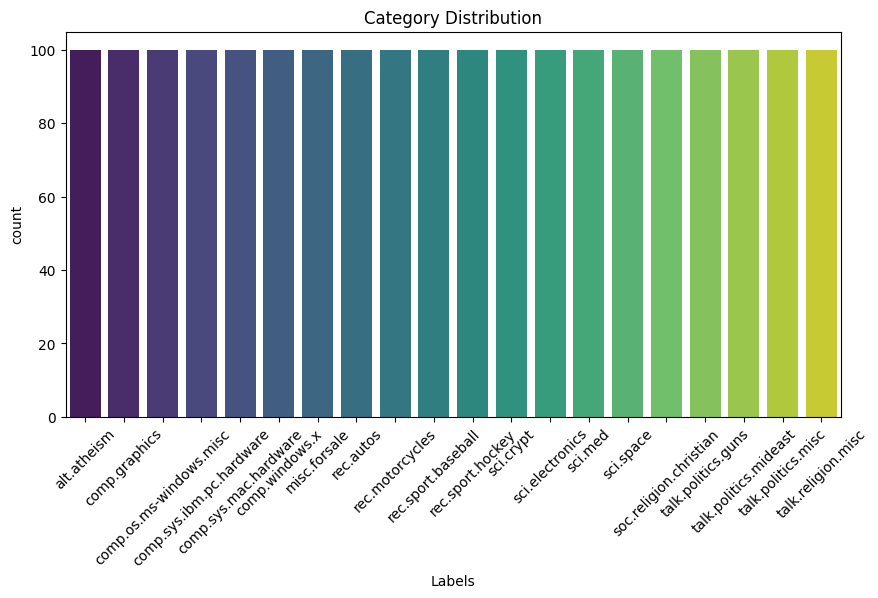

In [36]:
#Plot category distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Labels',order=df['Labels'].value_counts().index,palette="viridis")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()

In [37]:
stop_words=set(stopwords.words('english'))

In [38]:
def clean_text(text):
    text=text.lower()                         #lowercase
    text=re.sub(r'http\S+|www\S+', '', text)          #remove URLs
    text=text.translate(str.maketrans('', '', string.punctuation))    #remove punctuation
    tokens=text.split()                           #tokenize
    tokens=[w for w in tokens if w not in stop_words]         #remove stopwords
    return " ".join(tokens)

df['Cleaned_Text']=df['Data'].astype(str).apply(clean_text)
print("\nSample cleaned text:\n",df[['Data', 'Cleaned_Text']].head())


Sample cleaned text:
                                                 Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [39]:
#TF-IDF Feature Extraction
tfidf=TfidfVectorizer(max_features=5000)
X=tfidf.fit_transform(df['Cleaned_Text'])
y=df['Labels']
print("TF-IDF shape:", X.shape)

TF-IDF shape: (2000, 5000)


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [42]:
y_pred=nb_model.predict(X_test)

In [43]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 0.8225
Classification Report:                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.59      0.62      0.61        16
                 sci.med       0.88

In [44]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Confusion Matrix: [[15  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0 15  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 19  0  0  1  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  2 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0 21  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0 14  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0  1  1  0  1  0  0 10  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  1  0 17  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
from textblob import TextBlob

#function to get sentiment
def get_sentiment(text):
    polarity=TextBlob(text).sentiment.polarity
    if polarity>0.05:
        return "Positive"
    elif polarity<-0.05:
        return "Negative"
    else:
        return "Neutral"

#apply on Data column
df['Sentiment']=df['Data'].astype(str).apply(get_sentiment)
print(df[['Data','Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [ ]:
#sentiment distribution
print("Sentiment counts:",df['Sentiment'].value_counts())
#sentiment distribution per category
print("Sentiment distribution by category:",pd.crosstab(df['Labels'],df['Sentiment']))

Sentiment counts: Sentiment
Positive    1192
Neutral      542
Negative     266
Name: count, dtype: int64
Sentiment distribution by category: Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     12       28        60
comp.graphics                   15       25        60
comp.os.ms-windows.misc         17       19        64
comp.sys.ibm.pc.hardware        12       27        61
comp.sys.mac.hardware           12       24        64
comp.windows.x                  17       27        56
misc.forsale                    13       21        66
rec.autos                       11       20        69
rec.motorcycles                 14       24        62
rec.sport.baseball              17       27        56
rec.sport.hockey                20       28        52
sci.crypt                        8       32        60
sci.electronics                  7       39        54
sci.med                         19       28      

In [47]:
#metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred,average='weighted')
rec=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1-score:",f1)

Accuracy: 0.8225
Precision: 0.8281299559144919
Recall: 0.8225
F1-score: 0.8174927019571058


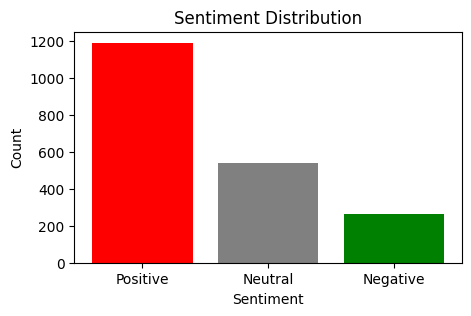

In [48]:
#sentiment counts
sentiment_counts=df['Sentiment'].value_counts()

#plot bar chart
plt.figure(figsize=(5,3))
plt.bar(sentiment_counts.index,sentiment_counts.values,color=['red','gray','green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#### Discussion
**Naive Bayes Performance:** The model gave a decent accuracy. 
* It works well for text classification because it assumes feature independence, but performance might drop if there’s overlapping vocabulary across categories.
* It worked well because TF-IDF features capture the frequency and importance of words, which matches how Naive Bayes handles independent word probabilities. 
* However, some misclassifications happened in categories with similar vocabularies (like comp.graphics vs comp.windows.x). 
* Another challenge was class imbalance, since some categories had more posts than others.

**Challenges:** Some categories have imbalanced data, making the model biased toward majority classes. Also, preprocessing choices (stopword removal, punctuation handling) can affect results.

**Sentiment Analysis Reflection:**
* After adjusting the threshold for polarity, we now get Positive, Negative, and Neutral sentiments. 
* Most blog posts fall into the Neutral category, which makes sense because many blogs are written in an informational or descriptive style rather than strongly opinionated. 
* Positive sentiments dominate in topics like misc.forsale and talk.religion.misc, which often contain friendly or persuasive language. 
* Negative sentiments were fewer overall but appeared more in categories like rec.sport.hockey and alt.atheism, where debates and disagreements are common.

**Implications:**
* The dominance of Neutral shows that a large share of blogs are objective in tone.
* Categories involving opinions, debates, or discussions lean more toward Positive/Negative.
* Sentiment analysis can highlight how different communities express themselves, e.g., technical groups stay mostly neutral, while social/religious groups show more polarity.